In [1]:
import sys
import cv2
import re
sys.path.append('..')

In [124]:
%matplotlib notebook

import math as m
import numpy as np
from scipy import ndimage

import matplotlib
import matplotlib.pyplot as plt

from core import Core

from global_var import COLORS


In [125]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [15]:
folder = r'C:\SPRUP_data_Jenda\2019_03_13_Jenda_microscopy\20_12_11_BC5/'.replace('\\', '/')

file = 'raw_02_1'


core = Core(folder, file)
core.downsample(5)
core.type = 'diff'
print(len(core))

99


In [213]:
# dir(core)

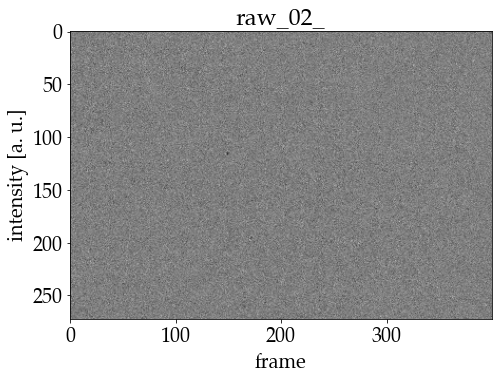

In [215]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')


axes.imshow(
    core.frame(61),
    cmap='gray',
    zorder=0,
    vmin=core.range[0],
    vmax=core.range[1]
)
    


# fig.savefig('images/intensity_fluctiations_SLED.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    


In [30]:
data = np.load(folder + 'saved_data/' + file + '.npy')
mask = data>0.1
data[mask] = 1
data = data.astype(int)

In [98]:
d = data[20:40,20:40,61]
print(d)

[[0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [149]:
labeled_data, num_features = ndimage.label(data, np.ones((3, 3, 3)))
# labeled_data, num_features = ndimage.label(data)
print(num_features)

778


In [171]:
objs = ndimage.find_objects(labeled_data)

In [172]:
type(objs)

list

In [180]:
o = objs[155]
new_positions = np.transpose(labeled_data[o].nonzero())

np_positions = np.average(new_positions, 1).astype(np.int)


print(o[1].start)
print(o[1].stop)

print(dir(o[1]))

236
239
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'indices', 'start', 'step', 'stop']


In [191]:
excl = 0
print(labeled_data[objs[17][:1]])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [1 1 1 ... 0 0 0]
  ...
  [1 1 1 ... 0 0 0]
  [1 1 1 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [1 1 1 ... 0 0 0]
  [1 1 1 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [1 1 1 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [1 1 1 ... 0 0 0]]]


<IPython.core.display.Javascript object>


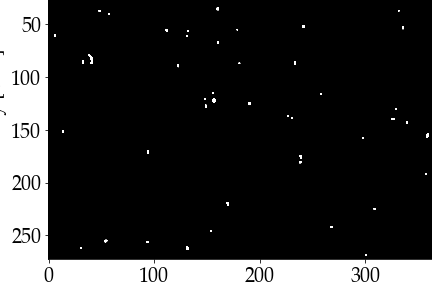

In [135]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_title(file)
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')



axes.imshow(
    labeled_data[:,:,85],
    cmap='gray',
    zorder=0,
    vmin=0,
    vmax=1
)
    


# fig.savefig('images/intensity_fluctiations_SLED.png', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')    
